# DIABETES PREDICTION

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('C:/Users/hp/Desktop/projectgithub/Diabetes-Prediction-Deployment-master/diabetes_kaggle.csv')

EDA

In [3]:
# Shows different datatypes for each columns
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [4]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [5]:
df = df.rename(columns={'DiabetesPedigreeFunction':'DPF'})
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [6]:
#Display first 10 number of rows
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0
5,0,173,78,32,265,46.5,1.159,58,0
6,4,99,72,17,0,25.6,0.294,28,0
7,8,194,80,0,0,26.1,0.551,67,0
8,2,83,65,28,66,36.8,0.629,24,0
9,2,89,90,30,0,33.5,0.292,42,0


In [7]:
df.shape

(2000, 9)

In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.182500,69.145500,20.935000,80.254000,32.193000,0.470930,33.090500,0.342000
std,3.306063,32.068636,19.188315,16.103243,111.180534,8.149901,0.323553,11.786423,0.474498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.375000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,40.000000,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    2000 non-null   int64  
 1   Glucose        2000 non-null   int64  
 2   BloodPressure  2000 non-null   int64  
 3   SkinThickness  2000 non-null   int64  
 4   Insulin        2000 non-null   int64  
 5   BMI            2000 non-null   float64
 6   DPF            2000 non-null   float64
 7   Age            2000 non-null   int64  
 8   Outcome        2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


In [10]:
df.isnull().values.any()

False

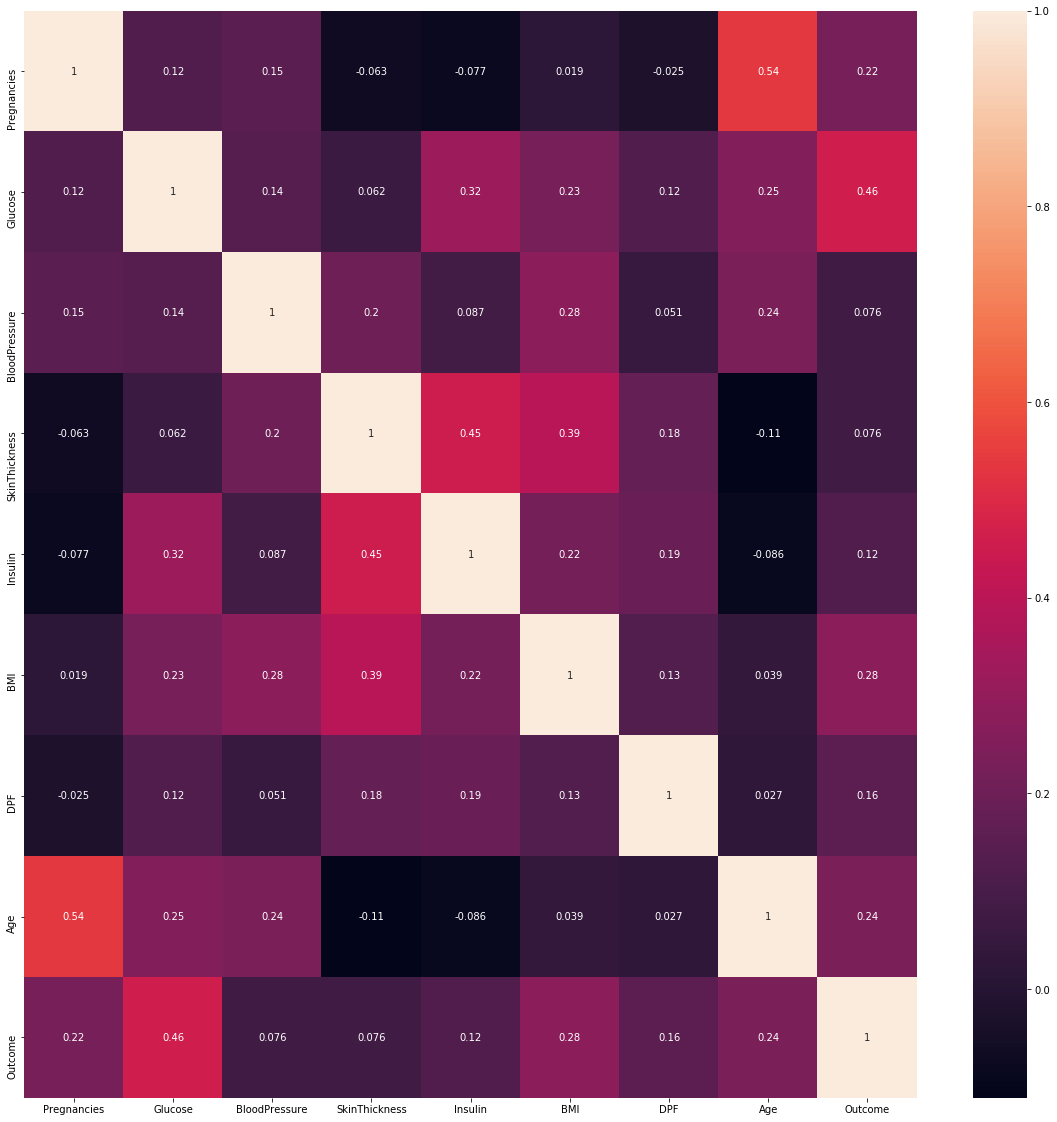

In [11]:
## Correlation for each feature and plotting heat map
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(df[top_corr_features].corr(),annot=True)

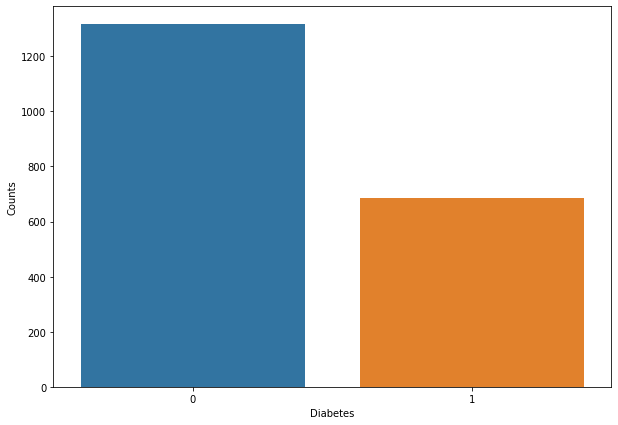

In [12]:
plt.figure(figsize=(10,7))
sns.countplot(x='Outcome', data=df)
plt.xlabel('Diabetes')
plt.ylabel('Counts')
plt.show()

In [13]:
df.isnull().sum()

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
DPF              0
Age              0
Outcome          0
dtype: int64

In [14]:
# Replacing the 0 values by NaN
df_copy = df.copy(deep=True)
df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)
df_copy.isnull().sum()

Pregnancies        0
Glucose           13
BloodPressure     90
SkinThickness    573
Insulin          956
BMI               28
DPF                0
Age                0
Outcome            0
dtype: int64

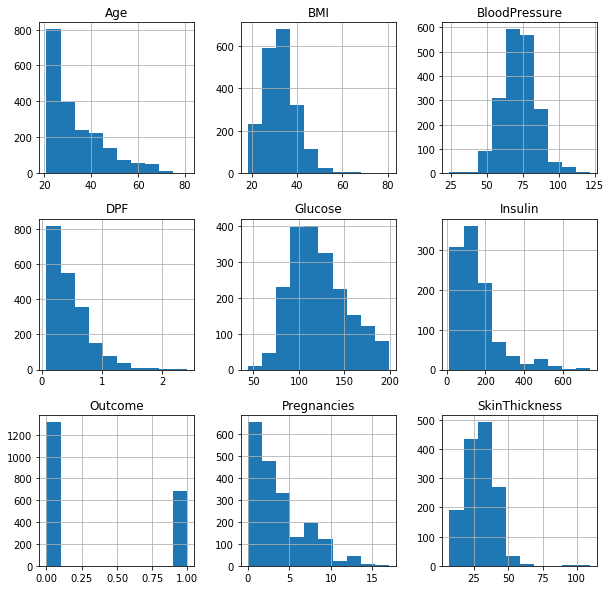

In [15]:
p = df_copy.hist(figsize = (10,10))

In [16]:
# Replacing NaN value by mean, median depending upon distribution
df_copy['Glucose'].fillna( df_copy['Glucose'].mean(), inplace=True)
df_copy['BloodPressure'].fillna( df_copy['BloodPressure'].mean(), inplace=True)
df_copy['SkinThickness'].fillna( df_copy['SkinThickness'].mean(), inplace=True)
df_copy['Insulin'].fillna( df_copy['Insulin'].mean(), inplace=True)
df_copy['BMI'].fillna( df_copy['BMI'].median(), inplace=True)

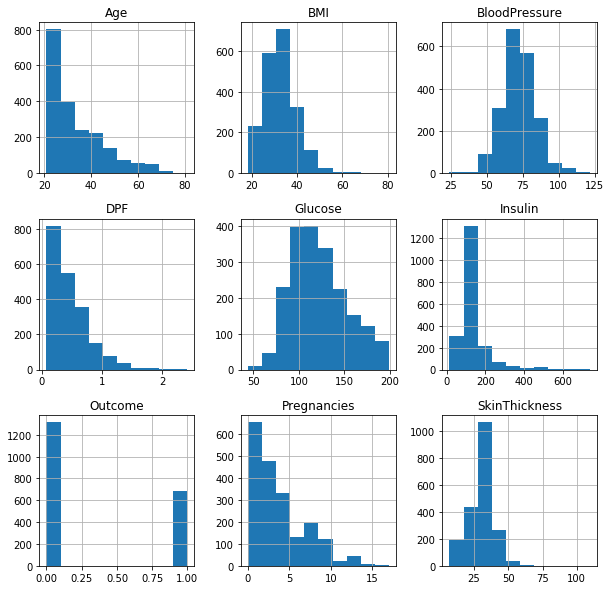

In [17]:
# Plotting histogram of dataset after replacing NaN values
p = df_copy.hist(figsize=(10,10))

In [18]:
from sklearn.model_selection import train_test_split
X = df.drop( columns='Outcome')
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20, random_state=0 )
print('X_train shape: {}, X_test shape: {}'.format(X_train.shape, X_test.shape))

X_train shape: (1600, 8), X_test shape: (400, 8)


In [19]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [20]:
# CrossValidation
#from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import ShuffleSplit

In [21]:
# Creating a function to calculate best model for this problem
def find_best_model(X, y):
    models = {
        'svm': {
            'model': SVC(gamma='auto'),
            'parameters': {
                'C': [10,20,25,30],
                'kernel': ['rbf','linear']
            }
        },
                
        'random_forest': {
            'model': RandomForestClassifier(criterion='gini'),
            'parameters': {
                'n_estimators': [50,100,110,120]
            }
        },
        'decision_tree': {
            'model': DecisionTreeClassifier(splitter='best'),
            'parameters': {
                'criterion': ['gini', 'entropy'],
                'max_depth': [5,10,15]
            }
        },
        
        
        'logistic_regression': {
            'model': LogisticRegression(solver='lbfgs', multi_class='auto'),
            'parameters': {
                'C': [5,10,15]
               }
        },

    }
    
    scores = [] 
    shuffle = ShuffleSplit(n_splits=5, test_size=0.20, random_state=0)
        
    for model_name, model_params in models.items():
         gscv = RandomizedSearchCV(model_params['model'], model_params['parameters'], cv = shuffle, return_train_score=False)
         gscv.fit(X, y)
         scores.append({
            'model': model_name,
            'best_parameters': gscv.best_params_,
            'score': gscv.best_score_
        })
        
    return pd.DataFrame(scores, columns=['model','best_parameters','score'])

find_best_model(X_train, y_train)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:281: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:281: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:281: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:281: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustiv

,model,best_parameters,score
0,svm,"{'kernel': 'rbf', 'C': 30}",0.871875
1,random_forest,{'n_estimators': 100},0.950000
2,decision_tree,"{'max_depth': 15, 'criterion': 'entropy'}",0.938125
3,logistic_regression,{'C': 10},0.763125


In [22]:
classifier = RandomForestClassifier(n_estimators=100)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [23]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
y_pred = classifier.predict(X_test)
cmatrix = confusion_matrix(y_test, y_pred)
cmatrix

array([[272,   0],
       [  4, 124]], dtype=int64)

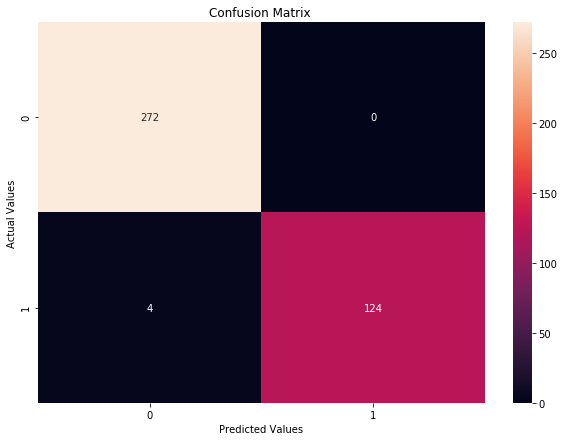

In [24]:
# Confusion matrix Plot
plt.figure(figsize=(10,7))
p = sns.heatmap(cmatrix, annot=True,fmt='g')
plt.title('Confusion Matrix ')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [25]:
acc = round(accuracy_score(y_test, y_pred),4)*100
print("Accuracy: {}%".format(acc))

Accuracy: 99.0%


In [26]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       272
           1       1.00      0.97      0.98       128

    accuracy                           0.99       400
   macro avg       0.99      0.98      0.99       400
weighted avg       0.99      0.99      0.99       400



In [27]:
# Creating a function for predicting diabetes
def predict_diabetes(Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DPF, Age):
    preg = int(Pregnancies)
    glucose = float(Glucose)
    bp = float(BloodPressure)
    sts = float(SkinThickness)
    insulin = float(Insulin)
    bmi = float(BMI)
    dpf = float(DPF)
    age = int(Age)
    x = [[preg, glucose, bp, st, insulin, bmi, dpf, age]]
    x = sc.transform(x)
    return classifier.predict(x)